<a href="https://colab.research.google.com/github/codestates/ds-sc11x/blob/master/ds_sc11x%20(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SC11x

## Data Preprocessing & Exploratory Data Analysis

## Data Preprocessing

이번 파트에서는 [Gapminder](https://www.gapminder.org/about-gapminder/)의 데이터를 다루게 됩니다.

데이터는 3가지로 구성되어 있으며 description은 다음과 같습니다.

- <https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data1.csv>
- <https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data2.csv>
- <https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data3.csv>

### data1

|geo|time|cell_phones_total|
|:-:|:-:|:-:|
|kor|2017|63658688|
|kor|2018|66355778|
|kor|2019|68892541|

- 지역, 연도, 통화수

### data2

|geo|time|population|
|:-:|:-:|:-:|
|kor|2017|51096415|
|kor|2018|51171706|
|kor|2019|51225308|

- 지역, 연도, 인구수

### data3

|geo|country|
|:-:|:-:|
|kor|South Korea|

- 지역, 나라 이름

### 1. Load and Explore the Data

- 데이터셋을 데이터프레임으로 불러오세요.
- 결측데이터를 확인하세요.
- `time` vs `cell_phones_total`에 대해서 `scatter plot`을 그리세요.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

세 파일을 각각 df1, df2, df3 로 불러오기.

In [ ]:
df1 = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data1.csv', index_col=0)
df2 = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data2.csv', index_col=0)
df3 = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data3.csv', index_col=0)

df1

,geo,time,cell_phones_total
0,abw,1960,0.0
1,abw,1965,0.0
2,abw,1970,0.0
3,abw,1975,0.0
4,abw,1976,0.0
...,...,...,...
9569,zwe,2015,12757410.0
9570,zwe,2016,12878926.0
9571,zwe,2017,14092104.0
9572,zwe,2018,12908992.0


세 데이터파일 모두 결측값은 없다. 0이 없어서 0인지 몰라서 그냥 0인지는 지금으로서는 알 수가 없다.

In [ ]:
df1.isnull().sum()

geo                  0
time                 0
cell_phones_total    0
dtype: int64

In [ ]:
df2.isnull().sum()

geo           0
time          0
population    0
dtype: int64

In [ ]:
df3.isnull().sum()

geo        0
country    0
dtype: int64

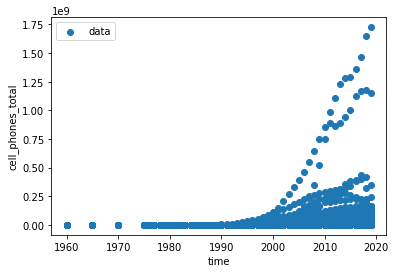

In [ ]:
plt.scatter(df1['time'], df1['cell_phones_total'], label = "data")

plt.legend(loc = "best")
plt.xlabel('time')
plt.ylabel('cell_phones_total')
plt.show()

## %config InlineBackend.figure_format = 'retina' 를 %matplotlib 뒤에 넣어주면 그래프를 더 높은 해상도로 출력한다.

### 2. Join data

다음 데이터를 만드세요. (shape = 9568 * 5)

|geo|time|cell_phones_total|population|country|
|:-:|:-:|:-:|:-:|:-:|
|abw|1960|0|54211|Aruba|
|...|...|...|...|...|
|zwe|2019|13195902.0|14645468|Zimbabwe|


인덱스를 숨기는 방법은 df.style.hide_index() 를 사용하면 되지만 생략합니다.

In [ ]:
df4 = pd.merge(df1, df2)
df5 = pd.merge(df4, df3)
df5.head()

,geo,time,cell_phones_total,population,country
0,abw,1960,0.0,54211,Aruba
1,abw,1965,0.0,57360,Aruba
2,abw,1970,0.0,59063,Aruba
3,abw,1975,0.0,60657,Aruba
4,abw,1976,0.0,60586,Aruba


In [ ]:
df5.shape

(9568, 5)

### 3. Feature Engineering

인구당 cell phone의 수를 표기한 `PPP`라는 feature를 추가하세요. 

그 결과로 2019년 한국에서 PPP가 1.3448이 나와야 합니다. (해당 내역을 보여주세요.)

In [ ]:
df5['PPP'] = df5['cell_phones_total'] / df5['population']

In [ ]:
df5.head()

,geo,time,cell_phones_total,population,country,PPP
0,abw,1960,0.0,54211,Aruba,0.0
1,abw,1965,0.0,57360,Aruba,0.0
2,abw,1970,0.0,59063,Aruba,0.0
3,abw,1975,0.0,60657,Aruba,0.0
4,abw,1976,0.0,60586,Aruba,0.0


In [ ]:
condition = (df5.country == 'kor') & (df5.time  == 2019)
is_kor = df5['geo'] == 'kor'
is_2019 = df5['time'] == 2019
kor_2019 = df5[is_kor & is_2019]
kor_2019

,geo,time,cell_phones_total,population,country,PPP
4805,kor,2019,68892541.0,51225308,South Korea,1.344893


In [ ]:
# 한줄로 구하기
df5.loc[(df5['country']=='South Korea')&(df5['time']==2019)]

,geo,time,cell_phones_total,population,country,PPP
4805,kor,2019,68892541.0,51225308,South Korea,1.344893


### 4. Data Manipulation

각 나라별로 평균 PPP를 계산하세요.

In [ ]:
mean_ppp = pd.DataFrame(df5['PPP'].groupby(df5['geo']).mean())
mean_ppp = mean_ppp.reset_index(drop = False, inplace=False)
mean_ppp

,geo,PPP
0,abw,0.384005
1,afg,0.133398
2,ago,0.124074
3,alb,0.324242
4,and,0.347083
...,...,...
208,wsm,0.121033
209,yem,0.136329
210,zaf,0.422318
211,zmb,0.173231


가장 많은 PPP 값을 갖는 top 10 (geo) 를 구하세요.

다음과 비슷한 결과가 나와야 합니다. 

|geo|PPP|
|:-:|:-:|
|are|0.741916|
|sau|0.757034|
|lie|0.806225|
|hkg|0.810664|
|mac|0.818130|
|isr|0.840197|
|srb|0.951586|
|nld_curacao|1.259227|
|mne|1.574349|
|sxm|1.899506|


In [ ]:
rank = mean_ppp.sort_values(by=['PPP'], axis = 0, ascending=False)[:10]
rank.loc[::-1]

,geo,PPP
5,are,0.741916
164,sau,0.757034
109,lie,0.806225
80,hkg,0.810664
115,mac,0.818130
91,isr,0.840197
173,srb,0.951586
141,nld_curacao,1.259227
127,mne,1.574349
181,sxm,1.899506


## EDA
이번 파트에서는 **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)** 의 데이터를 다루게 됩니다.


아래의 코드는 이미 여러분들을 위해 준비되어 있습니다. 아래 cell 을 실행하면 자동으로 data 가 load 되며, `df`라는 이름의 dataframe 을 얻게 될 겁니다. 

(원하신다면 추가 EDA를 하셔도 상관없지만, 이번 파트에서의 요구사항은 아닙니다.)


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

cable_news_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/media-mentions-2020/cable_weekly.csv'
online_news_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/media-mentions-2020/online_weekly.csv'

cable = pd.read_csv(cable_news_url)
online = pd.read_csv(online_news_url)

merged = pd.merge(cable[['date', 'name', 'pct_of_all_candidate_clips']], online[['date', 'name', 'pct_of_all_candidate_stories']])
merged['date'] = pd.to_datetime(merged['date'], infer_datetime_format=True)
merged = merged.set_index('date')

unique_dates = list(set(merged.index.to_list()))

import datetime

joe_biden_cable_multiple = []
joe_biden_online_multiple = []

for date in unique_dates:
  #that_day = merged.loc[datetime.date(year=date.year, month=date.month, day=date.day)]
  str_date = str(date.year)+"-"+str(date.month) + "-" + str(date.day)
  that_day = merged.loc[str_date]

  joe_biden_cable_that_day = that_day[that_day['name']=="Joe Biden"]['pct_of_all_candidate_clips']
  not_joe_biden_cable_max = that_day[that_day['name']!="Joe Biden"]['pct_of_all_candidate_clips'].max()
  joe_biden_cable_multiple_of_max = joe_biden_cable_that_day / not_joe_biden_cable_max

  joe_biden_online_that_day = that_day[that_day['name']=="Joe Biden"]['pct_of_all_candidate_stories']
  not_joe_biden_online_max = that_day[that_day['name']!="Joe Biden"]['pct_of_all_candidate_stories'].max()
  joe_biden_online_multiple_of_max = joe_biden_online_that_day / not_joe_biden_online_max


  joe_biden_cable_multiple.append(joe_biden_cable_multiple_of_max.values[0])
  joe_biden_online_multiple.append(joe_biden_online_multiple_of_max.values[0])

df = pd.DataFrame({'date': unique_dates, 'biden_cable_multiple':joe_biden_cable_multiple, 'biden_online_multiple': joe_biden_online_multiple})
df = df.set_index('date')
df = df.sort_index()

data_for_graph = df.loc[datetime.date(2019, 4, 15):]
print(data_for_graph.shape)
data_for_graph.head()

(27, 2)


,biden_cable_multiple,biden_online_multiple
date,,
2019-04-21,3.087352,1.107492
2019-04-28,3.707641,1.295820
2019-05-05,2.805169,1.306122
2019-05-12,3.235849,1.045386
2019-05-19,2.494624,1.119588


아래의 그림을 따라 그리세요 :

<img src='https://fivethirtyeight.com/wp-content/uploads/2019/10/Mehta-Media1028-1028-1.png' width = 500>



여러분들이 새로 만들게 될 plot은 다음을 만족해야 합니다:
- `example`과 유사한 `Cable News` vs `Online News` 2개의 line graph가 보여야 합니다. 
- 각 라인은 각각 **다른** 색깔을 가져야 합니다. (위 `example` 과 반드시 같은 색일 필요는 없습니다)
- 타이틀을 다음 내용으로 만드세요. _"Biden's Ukraine-related media bump is fading"_


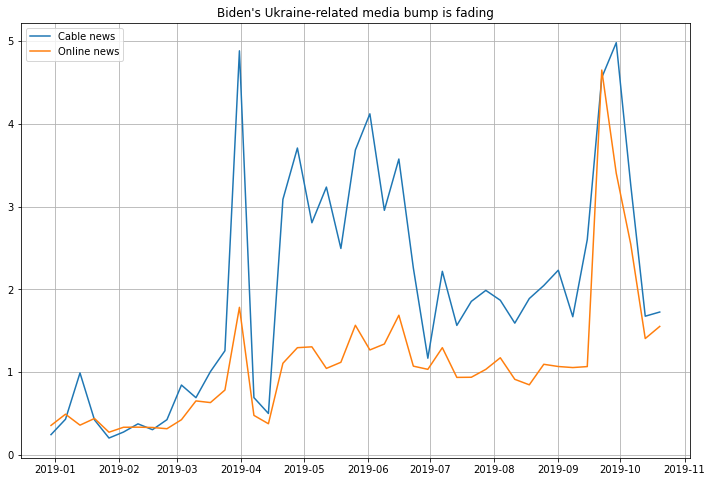

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(df['biden_cable_multiple'])
plt.plot(df['biden_online_multiple'])
plt.title("Biden's Ukraine-related media bump is fading")
plt.legend(['Cable news', 'Online news'], loc = 'best')
plt.grid(True)
plt.show()

## SC 3점 요구사항:

위에서 요구된 사항들을 모두 정확하게 만족하였으며, 아직 시간이 남았다면 아래 2개의 내용들중 하나를 만족하는 경우 3점을 얻을 수 있습니다. 

아래 요구사항들은 모두 **optional** 임을 다시 한 번 강조합니다. (필수 요구사항이 아닙니다.)

## 1. Data Preprocessing

- `cell_phones`dataframe 에서 필터를 걸어 USA 와 china 정보만 담게 하고, scatter plot 을 다시 그려 보세요. 

- geo code 를 lowercase가 아닌 uppercase 로 바꿔보세요. 

- 2017년은 China가 people(인구수)보다 cell phone 개수가 더 많아지는 첫번째 년도 입니다. 
미국의 경우, cell phone의 개수가 people 보다 더 많아지는 첫번째 년도는 언제인가요?

## 2. EDA

- 주어진 fivethirtyeight 그림 차트와 완벽히 동일하게 그려보세요. 


In [ ]:
filter = (df1['geo'] == 'chn') | (df1['geo'] == 'usa')
df_filter = df1.loc[filter,:]
df_filter

,geo,time,cell_phones_total
1627,chn,1960,0.0
1628,chn,1965,0.0
1629,chn,1970,0.0
1630,chn,1975,0.0
1631,chn,1976,0.0
...,...,...,...
9039,usa,2014,355500000.0
9040,usa,2015,382307000.0
9041,usa,2016,396000000.0
9042,usa,2017,400000000.0


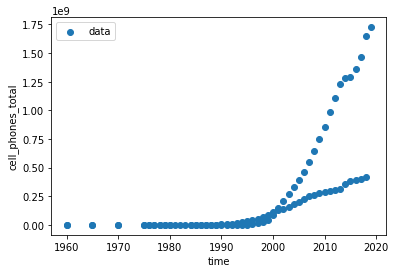

In [ ]:
plt.scatter(df_filter['time'], df_filter['cell_phones_total'], label = "data")

plt.legend(loc = "best")
plt.xlabel('time')
plt.ylabel('cell_phones_total')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


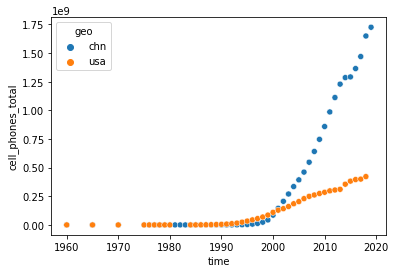

In [ ]:
# 색을 추가해서 비교

us_china = df1[(df1['geo'] == 'usa') | (df1['geo'] == 'chn')]
sns.scatterplot(us_china['time'],us_china['cell_phones_total'],hue=us_china['geo'])

In [ ]:
df_filter['geo'] = df_filter['geo'].apply(str.upper)
df_filter

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,geo,time,cell_phones_total
1627,CHN,1960,0.0
1628,CHN,1965,0.0
1629,CHN,1970,0.0
1630,CHN,1975,0.0
1631,CHN,1976,0.0
...,...,...,...
9039,USA,2014,355500000.0
9040,USA,2015,382307000.0
9041,USA,2016,396000000.0
9042,USA,2017,400000000.0


In [ ]:
df5['geo'] = df5['geo'].apply(str.upper)
df5

,geo,time,cell_phones_total,population,country,PPP
0,ABW,1960,0.0,54211,Aruba,0.000000
1,ABW,1965,0.0,57360,Aruba,0.000000
2,ABW,1970,0.0,59063,Aruba,0.000000
3,ABW,1975,0.0,60657,Aruba,0.000000
4,ABW,1976,0.0,60586,Aruba,0.000000
...,...,...,...,...,...,...
9563,ZWE,2015,12757410.0,13814629,Zimbabwe,0.923471
9564,ZWE,2016,12878926.0,14030331,Zimbabwe,0.917935
9565,ZWE,2017,14092104.0,14236595,Zimbabwe,0.989851
9566,ZWE,2018,12908992.0,14438802,Zimbabwe,0.894049


PPP가 1을 넘는 첫 번째 연도를 확인하면 된다.
미국의 경우 2014년이 처음으로 PPP가 1을 넘는다.

In [ ]:
filter2 = ((df5['geo'] == 'USA') & (df5['PPP'] >= 1))
result = df5.loc[filter2,:]
result['time'][:1]

9033    2014
Name: time, dtype: int64

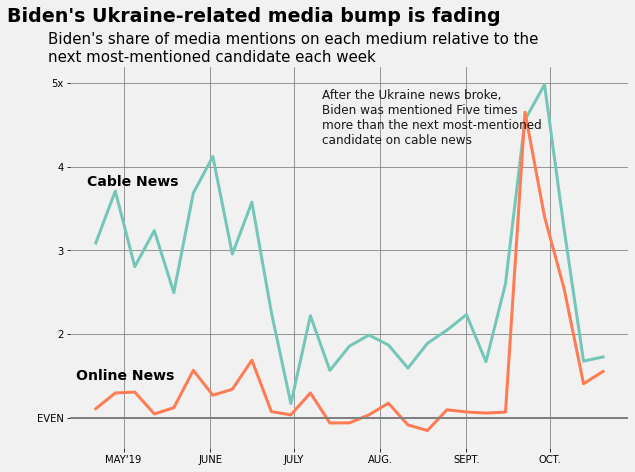

In [ ]:
# 그래프
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

fig.set_facecolor('#f1f1f1')
fig.set_figwidth(10)
fig.set_figheight(7)

plt.plot('biden_cable_multiple', data=data_for_graph, linewidth=3, color='#74c7b8')
plt.text(0.03, 0.69, 'Cable News', fontweight='bold', fontsize=14, transform=plt.gca().transAxes)

plt.plot('biden_online_multiple', data=data_for_graph, linewidth=3, color='#ff7b54')
plt.text(0.01, 0.18, 'Online News', fontweight='bold', fontsize=14, transform=plt.gca().transAxes)

plt.suptitle("Biden's Ukraine-related media bump is fading", fontweight='bold', fontsize=19, position=(0.38, 1))
plt.title("Biden's share of media mentions on each medium relative to the\nnext most-mentioned candidate each week",  fontsize=15, loc='left',position=(-0.04,1))

ax.text(x = 0.45, y = 0.8, horizontalalignment='left', alpha=0.9,
        s="After the Ukraine news broke, \nBiden was mentioned Five times \nmore than the next most-mentioned \ncandidate on cable news",
        fontsize=12, transform=ax.transAxes)

plt.grid(True, color='grey')
plt.axhline(y=1, color='grey', linewidth=2)
plt.box(False)

#축 값 다시 설정
plt.gca().set_xticklabels(["MAY'19", "JUNE", "JULY", "AUG.", "SEPT.", "OCT."])
plt.yticks([1,2,3,4,5], ['EVEN', '2', '3', '4', '5x'])

plt.show()

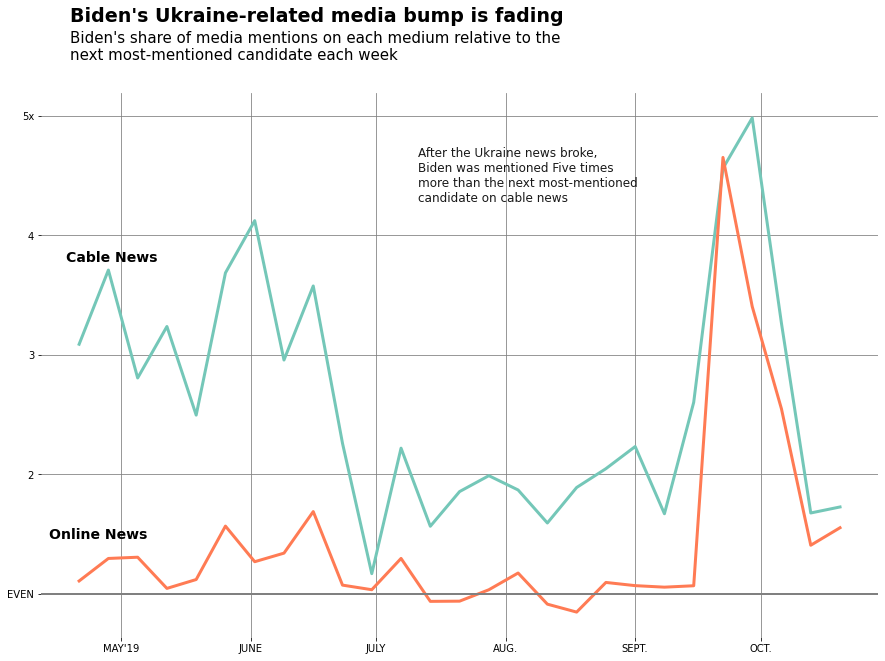

In [ ]:
fig, ax = plt.subplots()

fig.set_facecolor('w') ### 배경 색 지정
fig.set_figwidth(15)  ### 그림 너비 지정
fig.set_figheight(10) ### 그림 높이 지정

plt.plot('biden_cable_multiple', data=data_for_graph, linewidth=3, color='#74c7b8') ### 그릴 데이터, 선 굵기, 색 지정
plt.text(0.03, 0.69, 'Cable News', fontweight='bold', fontsize=14, transform=plt.gca().transAxes) ### 그래프에 텍스트 추가, 위치, 문자, 폰트, 폰트크기 지정

plt.plot('biden_online_multiple', data=data_for_graph, linewidth=3, color='#ff7b54')
plt.text(0.01, 0.18, 'Online News', fontweight='bold', fontsize=14, transform=plt.gca().transAxes)

plt.suptitle("Biden's Ukraine-related media bump is fading", fontweight='bold', fontsize=19, position=(0.38, 1))  ### 부제목 지정
plt.title("Biden's share of media mentions on each medium relative to the\nnext most-mentioned candidate each week",  fontsize=15, loc='left',position=(0.035, 1.05)) ### 제목 지정

ax.text(x = 0.45, y = 0.8, horizontalalignment='left', alpha=0.9,
        s="After the Ukraine news broke, \nBiden was mentioned Five times \nmore than the next most-mentioned \ncandidate on cable news",
        fontsize=12, transform=ax.transAxes)  ### 그래프 내 텍스트 삽입

plt.grid(True, color='grey')  # 격자삽입
plt.axhline(y=1, color='grey', linewidth=2) # y=1에 수평선 삽입
plt.box(False)

#축 값 다시 설정
plt.gca().set_xticklabels(["MAY'19", "JUNE", "JULY", "AUG.", "SEPT.", "OCT."]) # 눈금 설정
plt.yticks([1,2,3,4,5], ['EVEN', '2', '3', '4', '5x']) # 눈금 설정

plt.show()